# Assignment 2 : Gradient Descent

### Goal

Apply the simplest variant of gradient descent ("vanilla gradient descent", VGD) to two simple use cases:

a. Linear Regression: Test by comparing with the solution of the normal equations.<br>
b. Rosenbrock Function: Explore the behavior of the method with different initial values and learning rates.<br>

The formulas for the gradient for the two use cases can be found on the slides. These will be helpful to implement vanilla gradient descent. For validating that the formula and the implementation is correct, you also need to implement gradient checking. 

**Overview**

| Exercise | Content | Punkte |
| :--- | :--- | :---: |
| Exercise 1 | Vanilla Gradient Descent (VGD) | min req for "pass", 1 bonus point |
| Exercise 2 | Application of VGD to Linear Regression | min req for "pass" |
| Exercise 3 | Analysis of VGD applied to Linear Regression | min req for "pass", 1 bonus point |
| Exercise 4 | Application of VGD to Rosenbrock | min req for "pass" |
| Exercise 5 | Analysis of VGD applied to Rosenbrock | bonus points: 2 |

For convenience, I have added some unit test cells (marked as **<span style="color:green">TEST</span>**). If their execution do result in a **Python-Error** (e.g. Assertion Error) then something is probably wrong with your implementation. Don't modify the test cells.

Please send your solution by email to [Martin Melchior](mailto:martin.melchior@fhnw.ch).


## 1. Preparations, Imports, Plotting

Implement the methods below in <code>Numpy</code>. 

**Important Remark:** The function variables $x$ are vectors. With fixed numerical values this translates to numpy-arrays. The shape of the numpy arrays Numpy Arrays ist je nach Use Case unterschiedlich. Wir wählen in den Use Cases Lineare Regression und Rosenbrock Shapes $(n,1)$, wobei $n$ die Anzahl Variablen bezeichnet.

For plotting we will use <code>Matplotlib</code>. 

Accordingly, we only need the following two imports: 

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

For checking progress in the optimization process, we want to see how the cost and the learning speed progresses. The following function can be used to achieve that: <code>learningcurve_plots</code> 

In [3]:
def learningcurve_plots(cost_hist, learning_speed_hist, logy=False):
    """
    cost_hist -- history of cost values, as np-array of shape (T,1)
    learning_speed_hist -- history of learning speed values, as np-array of shape (T,1)
    logy -- if set to True will plot the y axis at logarithmic scale
    """
    plt.figure(1)
    T = len(cost_hist)
    if logy:
        plt.semilogy(np.arange(T),cost_hist,'b-')
    else:
        plt.plot(np.arange(T),cost_hist,'b-')
    plt.title("Cost")
        
    plt.figure(2)
    T = len(learning_speed_hist)
    if logy:
        plt.semilogy(np.arange(T),learning_speed_hist,'g-')
    else:
        plt.plot(np.arange(T),learning_speed_hist,'g-')
    plt.title("Learning Speed")

## 2. Vanilla Gradient Descent 

### Implementation

#### <span style="color:blue">EXERCISE 1</span> 


Implement a function for the computation of Vanilla Gradient Descent.
The functions should adopt the signature as described below. For passing other parameters to the cost and gradient function use "keyword arguments" (<code>kwargs</code>) that can be passed forward to the calculation of the cost and gradient. 

The implementation can be tested (to some extent) with the subsequent test cell.

In [22]:


def vanilla_gradient_descent( cost, gradient_cost, learningrate, x_initial, max_iter, eps=1.0e-4, **kwargs):
    """
    Performs plain vanilla gradient descent for the cost function with given gradient-function. The variables x of the function are provided as np-arrays.
    
    Arguments:
    cost -- cost function as a function object that accepts as input a np-array (shape of x) and returns a real number.
    gradient_cost -- gradient of the cost function that accepts as input a np-array (shape of x) and returns a np-array (shape of x).
    learningrate -- learning rate
    x_initial -- initial value, np-array with shape of x
    max_iter -- maximum number of iterations
    eps -- tolerance used for formulating the stopping criteria: here, formulated in terms of the length of the gradient.
    kwargs -- further arguments that can passed forward to the call of the cost and gradient function.
    
    Returns:
    xopt -- the optimum value x where the cost function is minimized (within the given tolerance): np-array with shape of x
    cost_hist -- history of the values of the cost function seen during the iteration loop: np-array of shape (T,1) where T is the number of iteration needed.
    learning_speed_hist -- history of the learning speed where the learning speed given by the norm of the difference between subsequent x-values: np-array of shape (T,1) where T is the number of iteration needed.
    """
    # START YOUR CODE
    x_k = x_initial
    int_cost_hist = []
    int_learning_speed_hist = []

    cost_x_k = cost(x_k, **kwargs)
    int_cost_hist.append([cost_x_k])

    grad_x_k_len = np.linalg.norm(gradient_cost(x_k, **kwargs))
    learning_speed_x_k = learningrate * grad_x_k_len

    i = 0
    while i < max_iter and (i == 0 or learning_speed_x_k >= eps):

        x_k = x_k - learning_speed_x_k

        cost_x_k = cost(x_k, **kwargs)
        grad_x_k_len = np.linalg.norm(gradient_cost(x_k, **kwargs))

        learning_speed_x_k = learningrate * grad_x_k_len
        int_cost_hist.append([cost_x_k])

        int_learning_speed_hist.append([learning_speed_x_k])

        i += 1

    return x_k, np.array(int_cost_hist), np.array(int_learning_speed_hist)
    # END YOUR CODE

#### <span style="color:green">TEST</span>

Number of iterations: 76, final cost: 0.00000, final speed: 0.00000


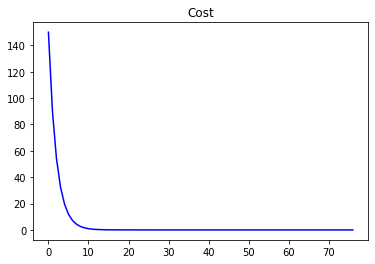

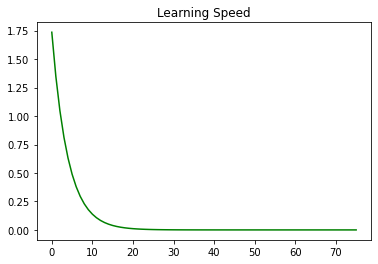

In [25]:
#########
# TEST
#######

def test_cost(x, a, b):
    """
    x - the variables to be optimized
    a - parameter (treated by vanilla_gradient_descent as kwargs)
    b - parameter (treated by vanilla_gradient_descent as kwargs)
    """
    return (a*x[0,0]**2 + b*x[1,0]**2)/2.0

def test_gradient_cost(x, a, b):
    """
    x - the variables to be optimized
    a - parameter (treated by vanilla_gradient_descent as kwargs)
    b - parameter (treated by vanilla_gradient_descent as kwargs)
    """
    return np.array([a,b]).reshape(2,1)*x

learningrate = 0.1
x0 = np.array([10,10]).reshape(2,1)

xopt, cost_hist, learning_speed_hist = vanilla_gradient_descent(test_cost, test_gradient_cost, learningrate, x0, 1000, eps=1.0e-8, a=1, b=2)
T = cost_hist.size-1
print("Number of iterations: %i, final cost: %6.5f, final speed: %6.5f"%(T, cost_hist[-1,0], learning_speed_hist[-1,0]))
learningcurve_plots(cost_hist, learning_speed_hist)

np.testing.assert_array_equal((2,1), xopt.shape)
np.testing.assert_array_equal((T+1,1), cost_hist.shape)
np.testing.assert_array_equal((T,1), learning_speed_hist.shape)
np.testing.assert_array_almost_equal(np.linalg.norm(xopt), 0.0, decimal=3)

## 3 Application to Linear Regression

Apply Vanilla Gradient Descent to the cost function used for linear regression.<br>
Test the method by comparing with the solution of the normal equations on the basis of the dataset studied in the lecture and exercise 2 of worksheet week 6. 

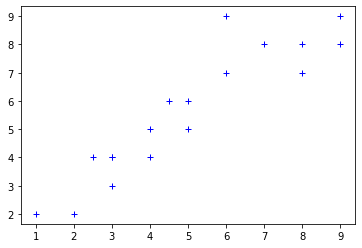

In [26]:
# Test Data
def load_regression_data():
    x = np.array([1.0,2.0,3.0,2.5,3.0,3.0,4.0,4.0,4.5,5.0,5.0,6.0,6.0,7.0,8.0,8.0,9.0,9.0])
    N = x.size
    x = x.reshape(N,1)
    y = np.array([2.0,2.0,4.0,4.0,3.0,4.0,4.0,5.0,6.0,5.0,6.0,7.0,9.0,8.0,7.0,8.0,8.0,9.0]).reshape(N,1)
    return x,y

x,y = load_regression_data()
plt.plot(x,y,'b+')

def design_matrix(x):
    X = np.stack((x**0, x), axis=1)
    X = X.squeeze()
    return X
    
X = design_matrix(x)

#### <span style="color:blue">EXERCISE 2</span> 

Implement the cost function and its gradient for a general linear regression problem with design matrix $X$ and target value vector $y$.

As cost function we use the average square distance between target values $y^{(i)}$ and values predicted by the model $\hat{y}^{(i)}$. 

Don't get confused about the notation and what needs to get optimized, i.e. the linear regression parameters $\alpha$. The data points $x,y$ and the design matrix are considered as additional parameters.

In [27]:
def lin_regression_cost(alpha, X, y):
    """
    Cost function for the linear regression problem with affine linear model.

    Arguments:    
    alpha -- array of parameters to be optimized: np-array of shape (m,1)
    X -- design matrix, array of shape (N, m)
    y -- regression result, array of shape (N,1)
    
    Returns:
    cost -- the cost function for the given parameter array
    """
    # START YOUR CODE
    # Squared Error Cost Function
    return np.sum((y - (X.dot(alpha)))**2) / (2*len(y))
    # END YOUR CODE
    
def lin_regression_gradient_cost(alpha, X, y):
    """
    Gradient of the cost function for the linear regression problem with affine linear model.
    Arguments:
    alpha -- array of parameters to be optimized: np-array of shape (m,1)
    X -- design matrix, array of shape (N, m)
    y -- regression result, array of shape (N,1)
    
    Returns:
    gradient_cost -- the gradient of the cost function for the given parameter array
    """
    # START YOUR CODE
    return ((2*X.T).dot(y) - (2*X.T).dot(X).dot(alpha)) / (-2*len(y))
    # END YOUR CODE
    
def optimized_parameters_exact(X,y):
    """
    Arguments:
    X -- design matrix, array of shape (N, m)
    y -- regression result, array of shape (N,1)

    Returns:
    alpha_opt -- the optimized parameters by solving the normal equations
    """
    # START YOUR CODE
    # return [[1.15133474], [0.88571543]]
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    # END YOUR CODE


#### <span style="color:green">TEST</span>

In [28]:
########
# TEST
########
x,y = load_regression_data()
X = design_matrix(x)
alpha0 = np.array([1,1]).reshape(2,1)
np.testing.assert_almost_equal(0.5138888888888888, lin_regression_cost(alpha0, X=X, y=y))
np.testing.assert_array_equal((2,1), lin_regression_gradient_cost(alpha0, X=X, y=y).shape)
np.testing.assert_array_almost_equal(np.array([0.38888889,2.75]).reshape(2,1), lin_regression_gradient_cost(alpha0, X=X, y=y), decimal=8)
alpha, _, _ = vanilla_gradient_descent(lin_regression_cost, lin_regression_gradient_cost, 0.001, alpha0, 200000, eps=1.0e-6, X=X, y=y)
np.testing.assert_array_equal((2,1), alpha.shape)
np.testing.assert_array_almost_equal(optimized_parameters_exact(X, y), alpha, decimal=2)

AssertionError: 
Arrays are not almost equal to 2 decimals

x and y -inf location mismatch:
 x: array([[1.33],
       [0.86]])
 y: array([[-inf],
       [-inf]])

#### <span style="color:blue">EXERCISE 3 </span>

Apply Vanilla Gradient Descent to the linear regression use case. 
Examine the number of iterations as a function of the learning rate: Choose the fixed starting value $(1,1)$ and an accuracy $\epsilon = 1.0e^{-6}$.
1. Determine the range $[\rho_{\rm min}, \rho_{\rm max}]$ from which the learning rate can be chosen at which Vanilla Gradient Descent converges. 
2. Determine the optimal learning rate $\rho_{\rm opt}$ at which the number of iterations becomes minimal.
3. What happens at learning rates larger than $\rho_{\rm opt}$? Explain - also by studying the learning speed curve.


Optimal learning rate: 0.0000133
Valid learning_rate range: 0.0000095 -> 0.0000136


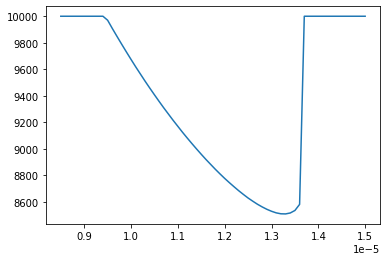

In [45]:
# EXERCISE 3.1

x,y = load_regression_data()
X = design_matrix(x)

# START YOUR CODE
learning_rate_range = np.arange(8.5e-6, 1.5e-5, 1e-7)
number_iterations_hist = np.array([])

max_iterations = 10000
min_iterations = max_iterations

p_min = 0
p_opt = 0
p_max = 0

for p in learning_rate_range:
    _, _, learning_speed_hist = vanilla_gradient_descent(lin_regression_cost, lin_regression_gradient_cost, p, np.array([1,1]).reshape(2,1), max_iterations, eps=1.0e-6, X=X, y=y)
    number_iterations = len(learning_speed_hist)
    number_iterations_hist = np.append(number_iterations_hist, number_iterations)

    if number_iterations < max_iterations:
        p_max = p
        p_min = p if p_min == 0 else p_min

        if number_iterations < min_iterations:
            min_iterations = number_iterations
            p_opt = p


plt.plot(learning_rate_range, number_iterations_hist)

print("Optimal learning rate: ", p_opt)
print("Valid learning_rate range: (", p_min, ", ", p_max, ")")

# END YOUR CODE

**Comments**:
* The optimal learning rate as well as the range in which the function will converge, has to be found by experimenting.
* We have to guess a reasonable starting value for the learning rate.
* Then we step through a range of values to see if and after how many iterations the the function converges.
*  $\rho_{\rm min}$ is the first $\rho$ for which it converges at all.
*  $\rho_{\rm max}$ is the last $\rho$ for which it converges at all.
*  $\rho_{\rm max}$ is the $\rho$ which converges after the least amount of operations.

**Exercise 3.2:**

As shown in the code above:

* $\rho_{\rm opt}$ = 0.0000133


**Exercise 3.3:**

If the learning rate is larger than $\rho_{\rm opt}$ the function will still converrge as long as it is still smaller than $\rho_{\rm max}$.

As soon as the rate becomes larger than $\rho_{\rm max}$ the function will no longer converge but diverge.


### 4. Application to Rosenbrock Function

Rosenbrock function is defined by

$\qquad f(x,y)= \frac{1}{2}\left((4(x^2-y))^2+(y-1)^2\right)$


#### <span style="color:blue">EXERCISE 4</span>

Implement Vanilla Gradient Descent applied to Rosenbrock's function: Implement the function and its gradient.

In [ ]:
def rosenbrock(x):
    """
    Arguments:
    x -- a 2d np-array (of shape (2,1)) 

    Returns:
    c -- value of the rosenbrock function
    """    
    # START YOUR CODE  
    return 0.5*((4*(x[0,0]**2-x[1,0]))**2+(x[1,0]-1)**2)
    # END YOUR CODE
    
def gradient_rosenbrock(x):
    """
    Arguments:
    x -- a 2d np-array (of shape (2,1)) 

    Returns:
    gradient -- gradient of the rosenbrock function, np-array of shape (2,1)
    """    
    # START YOUR CODE
    fx =  16 * (x[0,0]**2 - x[1,0]) * 2 * x[0,0]
    fy = -16 * (x[0,0]**2 - x[1,0]) + (x[1,0]-1)
    return np.array([[fx], [fy]])
    # END YOUR CODE

#### <span style="color:green">TEST</span>

In [ ]:
########
# TEST
########
np.testing.assert_almost_equal(0.0, rosenbrock(np.array([1,1]).reshape(2,1)), decimal=8)
np.testing.assert_almost_equal(0.0, rosenbrock(np.array([-1,1]).reshape(2,1)), decimal=8)
np.testing.assert_almost_equal(17.0/2.0, rosenbrock(np.array([1,0]).reshape(2,1)), decimal=8)

np.testing.assert_almost_equal(np.array([0,0]).reshape(2,1), gradient_rosenbrock(np.array([1,1]).reshape(2,1)), decimal=8)
np.testing.assert_almost_equal(np.array([32,-17]).reshape(2,1), gradient_rosenbrock(np.array([1,0]).reshape(2,1)), decimal=8)

#### <span style="color:blue">AUFGABE 5</span>

Apply Vanilla Gradient Descent as implemented in EXERCISE 1. to Rosenbrock's function.<br>

1. Analyse the behavior of GD with different learning rates. Select a fixed initial value $(0.5,0.0)$ and a precision $1.0e^{-6}$. For comparison, prepare a plot with number of iterations needed vs learning rate. What learning rates are possible? Is there an optimal learning rate? **Remark:** Only accept solutions that lead to the minimum in the right half plane (located at $(1,1)$).  

2. Analyse the behavior of GD with different learning rates - now selecting $(1.0,0.0)$ as initial value (und again a precision $1.0e^{-6}$). Is there a difference in the behavior? 

3. Analyse the behavior of GD with varying initial value at a fixed learning rate $\rho=0.02$. Choose initial values always on the x-axis, i.e. $(x,0)$. Prepare a plot with the number of iterations vs initial values. 

4. Are there areas in the (x,y)-plane that are particularly problematic to be used for the starting values? 


In [ ]:
# EXERCISE 5.1

# START YOUR CODE
alpha0 = np.array([[0.5],[0.0]])
xopt, co_hist, ls_hist = vanilla_gradient_descent(rosenbrock, gradient_rosenbrock, 1e-10, alpha0, 10000000000, eps=1e-6)
learningcurve_plots(co_hist, ls_hist)
print (xopt)
# END YOUR CODE

**Kommentar**:

()


In [ ]:
# EXERCISE 5.2

# START YOUR CODE
alpha0 = np.array([[1.0],[0.0]])
xopt, co_hist, ls_hist = vanilla_gradient_descent(rosenbrock, gradient_rosenbrock, 1e-10, alpha0, 10000000000, eps=1e-6)
learningcurve_plots(co_hist, ls_hist)
print (xopt)
# END YOUR CODE

**Comments**:

()


In [ ]:
# EXERCISE 5.3

# START YOUR CODE







# END YOUR CODE

In [ ]:
# EXERCISE 5.4







